# **Laboratorio 2, A Titanic Probability.**
#### El 15 de abril de 1912 el transatlántico de pasajeros más grande jamas construido "Titanic" chocó con un iceberg durante su viaje inagural. En su hundimiento murieron 1502 pasajeros de los 2224 que iban a bordo incluyendo a su tripulación.

#### El conjunto de datos "titanic.csv" contiene datos de 887 pasajeros reales del Titanic. Cada fila representa a una persona. 

#### Las columnas describen diferentes atributos sobre la persona: 


- sobrevivió (Survived)
- clase de pasajero (Pclass)  
- nombre (Name)
- sexo (Sex)
- edad (Age)
- hermanos/conyugues abordo (Siblings/Spouses aboard) 
- padres/niños abordo (Parents/Children Aboard)  
- tarifa que pagó en £s (Fare).

Primero que todo, se indica que se van a utilizar datos extraidos de google drive

Se indica la ruta para acceder al archivo con el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TIC


/content/drive/MyDrive/TIC


## **Cargando bibliotecas de python**

In [ ]:
!pip install scikit_posthocs
import pandas as pd #se importan el modulo panda para el trabajo con el DataSet
import matplotlib.pyplot as plt #para plotear graficas
import seaborn as sns #para graficar
import numpy as np
from scipy import stats
import scikit_posthocs as sp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Cargando Datos**

In [ ]:
df = pd.read_csv('titanic.csv',sep=',')#notar que los archivos estan separados por coma no por punto y coma
df.head() #para comprobar como cargaron los datos

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df.info()#identificando el tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
cName = df["Name"].unique() #Genera un array con los nombres unicos de los pasajeros
len(cName) #cuenta el numero de elementos en el array

887

#### Esto muestra que el nombre de cada pasajero es unico


#### El tipo Name podria quedar como un identificador unico de cada fila ya que ningun nombre de pasajero se repite, asi moveremos esta columna a la primera posicion de izquierda a derecha
#### Tambien podemos decir que los tipos de datos estan bien asignados a cada variable ademas que no existen elementos nulos.

#### Los Dtype estan bien asignados siendo enteros, tipo coma flotante y objetos para las cadenas
#### Podemos observar que se tienen 4 tipos de datos cuantitativos:

- Age
- Siblings/Spouses Aboard
- Parents/Children Aboard
- Fare

#### Y los otros 4 son cualitativos nominales:
- Survived 
- Pclass
- Name
- Sex

In [ ]:
cols = df.columns.tolist()
reorder_cols = cols[-6:-5] + cols[0:2] + cols[3:] 
df1 = df[reorder_cols] #cambia el orden del DataFrame dejando a Name al principio
df1.columns = ['Name', 'Survived', 'Pclass', 'Sex', 'Age', 'SiblingsSpousesAboard', 'ParentsChildrenAboard', 'Fare'] #Renombrando nombres de columnas para que no tengamos problemas al invocarlas
df1.head() #Asi quedara el DataFrame con el que trabajaremos

,Name,Survived,Pclass,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare
0,Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1,female,38.0,1,0,71.2833
2,Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
4,Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [ ]:
sexCategorica = df1.filter(['Sex'])
sexNumerical = pd.get_dummies(sexCategorica.iloc[:,0], drop_first=True) #se transforma Sex a tipo numerico


In [ ]:
df1 = df1.drop(['Sex'], axis=1) #elimina la columna Sex
df1 = pd.concat([df1, sexNumerical], axis=1) #se concatena a el DataFrame principal SexNumerical
df1.columns = ['Name', 'Survived', 'Pclass', 'Age', 'SiblingsSpousesAboard', 'ParentsChildrenAboard', 'Fare', 'Sex'] #se renombran las columnas
df1

,Name,Survived,Pclass,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Sex
0,Mr. Owen Harris Braund,0,3,22.0,1,0,7.2500,1
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1,38.0,1,0,71.2833,0
2,Miss. Laina Heikkinen,1,3,26.0,0,0,7.9250,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,35.0,1,0,53.1000,0
4,Mr. William Henry Allen,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,0,2,27.0,0,0,13.0000,1
883,Miss. Margaret Edith Graham,1,1,19.0,0,0,30.0000,0
884,Miss. Catherine Helen Johnston,0,3,7.0,1,2,23.4500,0
885,Mr. Karl Howell Behr,1,1,26.0,0,0,30.0000,1


#### Se reordenaron las columnas, se cambio el nombre a algunas de ellas para que no generaran errores de sintaxis, ademas se paso a tipo numerico la variable Sex.

## **Análisis descriptivo**

### <font color='green'>Variables cualitativas nominales</font> 

### Variable `Pclass`

In [ ]:
df1.groupby("Pclass").agg(Frequency=("Pclass", "count")) #se crea la tabla de frecuencias para la variable Pclass

,Frequency
Pclass,
1,216
2,184
3,487


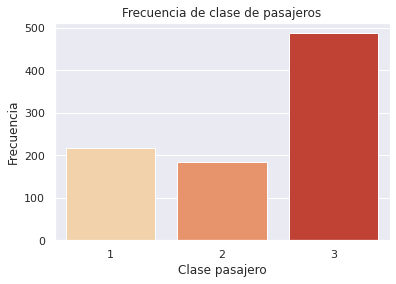

In [ ]:
countsPclase = df1.Pclass.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsPclase.index, y=countsPclase.values, palette="OrRd") #Genera el grafico de barras
plt.title("Frecuencia de clase de pasajeros")
plt.ylabel("Frecuencia")
plt.xlabel("Clase pasajero")
plt.show() #Muestra el grafico

#### Se puede observar que la mayor frecuencia la tiene la clase tres

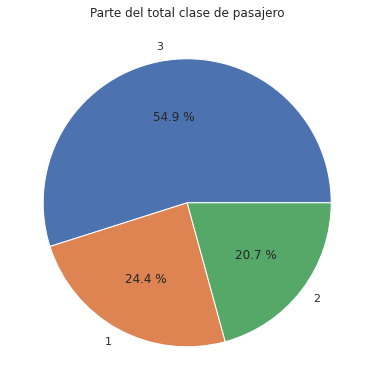

In [ ]:
PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total clase de pasajero")
plt.pie(countsPclase.values[:PLOT_SIZE], labels = countsPclase.index[:PLOT_SIZE], autopct="%0.1f %%")
plt.show()

#### La tercera clase es la que habia en mayor cantidad en esta muestra de 887 pasajeros

### Variable `Sex`

In [ ]:
(df1.groupby("Sex").agg(Frequency=("Sex", "count"))) #Muestra la tabla de frecuencia

,Frequency
Sex,
0,314
1,573


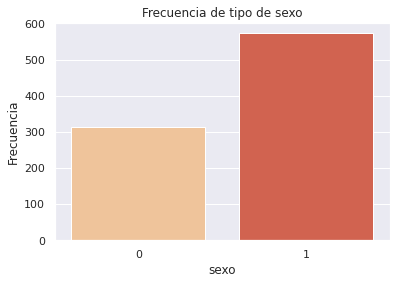

In [ ]:
countsSex = df1.Sex.value_counts()
sns.set(color_codes = True) 
sns.barplot(x = countsSex.index, y = countsSex.values, palette = "OrRd") #Genera el grafico de barras
plt.title("Frecuencia de tipo de sexo")
plt.ylabel("Frecuencia")
plt.xlabel("sexo")
plt.show() #muestra el grafico

#### Donde 0 es Femenino y 1 Masculino. Se puede observar una mayor cantidad de hombres que mujeres del total de 887 pasajeros.

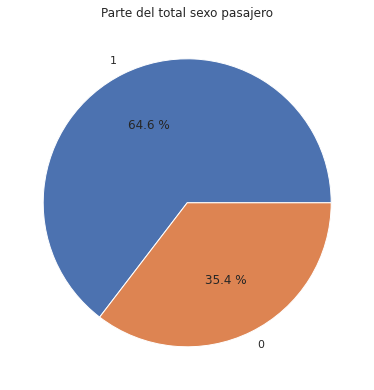

In [ ]:
PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total sexo pasajero")
plt.pie(countsSex.values[:PLOT_SIZE], labels = countsSex.index[:PLOT_SIZE], autopct="%0.1f %%")
plt.show()

#### Se puede observar en este grafico de torta la proporcion entre hombres y mujeres de los 887 pasajeros

### Variable `Survived`

In [ ]:
df1.groupby("Survived").agg(Frequency=("Survived", "count")) #se crea la tabla de frecuencias

,Frequency
Survived,
0,545
1,342


#### Donde 0 es no sobrevivio y 1 sobrivivio

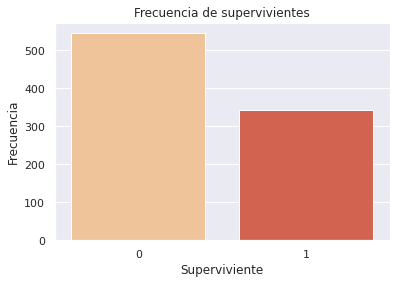

In [ ]:
countsSurvived = df1.Survived.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsSurvived.index, y=countsSurvived.values, palette="OrRd")
plt.title("Frecuencia de supervivientes")
plt.ylabel("Frecuencia")
plt.xlabel("Superviviente")
plt.show()

#### Se observa que la mayor frecuencia la tienen los supervivientes

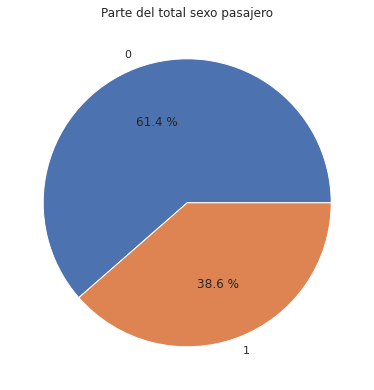

In [ ]:

PLOT_SIZE = 5
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.title("Parte del total sexo pasajero")
plt.pie(countsSurvived.values[:PLOT_SIZE], labels = countsSurvived.index[:PLOT_SIZE], autopct="%0.1f %%")
plt.show()

#### Aqui la proporcion entre superviviente y no superviviente en este diagrama de torta

### <font color='green'>Ahora las variables cuantitativas</font>

In [ ]:
df1Cuanti = df1.loc[:, ['Age','SiblingsSpousesAboard', 'ParentsChildrenAboard', 'Fare' ]] #filtrando variables cuantitativas
df1Estadisticos = df1Cuanti.describe().round(2)


In [ ]:
filaCV = []
for i in range (len (df1Cuanti.iloc[0:4])):
    filaCV.append(((df1Estadisticos.iloc[2][i]) / (df1Estadisticos.iloc[1][i])).round(2))
df1Estadisticos.loc['CV'] = filaCV
df1Estadisticos

,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare
count,887.00,887.00,887.00,887.00
mean,29.47,0.53,0.38,32.31
std,14.12,1.10,0.81,49.78
min,0.42,0.00,0.00,0.00
25%,20.25,0.00,0.00,7.92
50%,28.00,0.00,0.00,14.45
75%,38.00,1.00,0.00,31.14
max,80.00,8.00,6.00,512.33
CV,0.48,2.08,2.13,1.54


### Obtenemos los estadisticos basicos
para AGE la cv < 0.5, la media artimetica es representativa, para todas las demas variables ya que cv > 1 la media no es representativa y por tanto se rechaza como promedio.

### Variable `Age`

In [ ]:
(df1.groupby("Age").agg(Frequency=("Age", "count"))) #Muestra la tabla de frecuencia

,Frequency
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


#### Se puede apreciar pasajeros de todas las edades desde bebes hasta ancianos

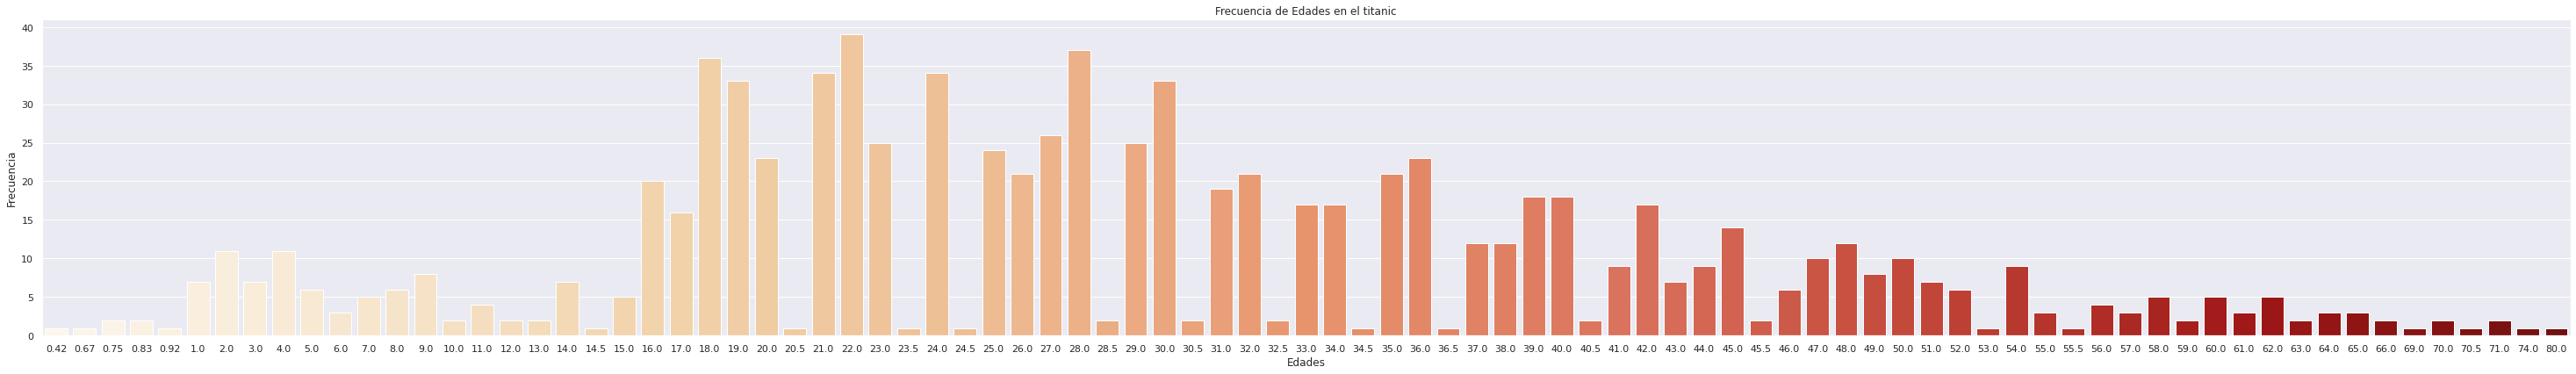

In [ ]:
countsAge = df1.Age.value_counts()
fig = plt.figure(figsize = (40,5))
ax = fig.add_axes([1,0,1,1])
sns.set(color_codes = True) 
sns.barplot(x=countsAge.index, y=countsAge.values, palette="OrRd") #Genera el grafico de barras
plt.title("Frecuencia de Edades en el titanic")
plt.ylabel("Frecuencia")
plt.xlabel("Edades")
plt.show()

#### Haciendo doble click izquierdo sobre el grafico se puede ver de mejor manera. Se puede observar que la mayor cantidad de gente esta entre los 18 y 40 años como tambien que los ancianos y bebes son solo unos cuantos. EL minimo de edad es de 0.42 años el maximo de 80 años.

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [ ]:
mode = df1['Age'].mode() # Calculo moda
print(mode)

0    22.0
dtype: float64


#### 22 años es la edad que mas recurrente en la tripulacion de 887 personas

#### <span style="color: #7A3BDB">Diagrama de Cajas</span>

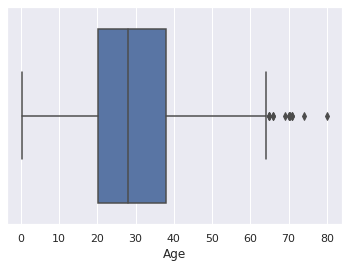

In [ ]:
sns.boxplot( x=df["Age"]) #Genera el diagrama de caja y bigote

#### La mediana bordea los 30 años, el primer cuartil los 20 y el tercer quartil los 40 años, su extremo inferior y superior son 0 y casi 65 respectivamente con datos atipicos pasando este extremo, tambien se puede observar que es levemente asimetrico hacia la izquierda y que los datos no estan agrupados.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [ ]:
varianceAge = df1['Age'].var()# Calculo Varianza
print(varianceAge)

199.42829701227413


#### La varianza es muy alta esto quiere decir que existe mucha dispersion entre los datos respecto a la media

#### <span style="color: #7A3BDB">Asimetria</span>

In [ ]:
df1['Age'].skew()

0.44718857190799916

#### La variable `Age` tiene una asimetria positiva (a la derecha)

#### <span style="color: #7A3BDB">Curtosis</span>

In [ ]:
df1['Age'].kurt()

0.2925590867837582

#### La distribucion es Leptocúrtica

### Variable `SiblingsSpousesAboard`

In [ ]:
(df1.groupby("SiblingsSpousesAboard").agg(Frequency=("SiblingsSpousesAboard", "count"))) #Muestra la tabla de frecuencia

,Frequency
SiblingsSpousesAboard,
0,604
1,209
2,28
3,16
4,18
5,5
8,7


#### Se puede observar que la mayor cantidad de personas no llevaba hermanos(as) ni conyuges a bordo y que la maxima cantidad de estas fue hasta de 8 que la tenian 7 tripulantes

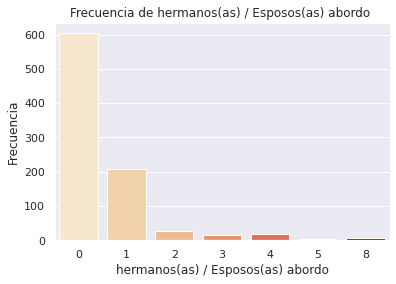

In [ ]:
countsSiblingsAboard = df1.SiblingsSpousesAboard.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsSiblingsAboard.index, y=countsSiblingsAboard.values, palette="OrRd")
plt.title("Frecuencia de hermanos(as) / Esposos(as) abordo ")
plt.ylabel("Frecuencia")
plt.xlabel("hermanos(as) / Esposos(as) abordo")
plt.show()

#### Se aprecia como la frecuencia baja a medida que la cantidad de hermano/conyuge aumenta

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [ ]:
modeSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].mode() # Calculo moda
print(modeSiblingsSpousesAboard)

0    0
dtype: int64


#### Como ya lo mostraba el grafico ahora el calculo de la moda lo ratifica, la cantidad de hermanos/conyuges que mas pasajeros tienen es 0

#### <span style="color: #7A3BDB">Diagrama de Cajas</span>

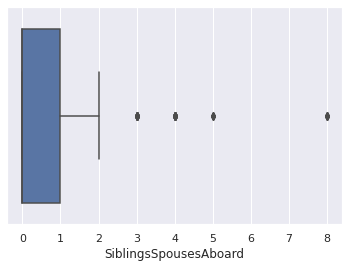

In [ ]:
sns.boxplot( x=df1["SiblingsSpousesAboard"]) #genera el diagrama de caja y bigotes

#### La mediana es 0, el primer cuartil 0 y el tercer cuartil 1, su extremo inferior y superior son 0 y 1 respectivamente, tambien posee 4 valores atipicos el mas alejado es el de 8 hermanas/conyuges.
#### Se puede observar que el diagrama es asimetrico a la izquierda, tambien se ver una baja dispersion de los datos.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [ ]:
varianceSiblingsSpousesAboard = df1['SiblingsSpousesAboard'].var()# Calculo Varianza
print(varianceSiblingsSpousesAboard)

1.2202926139038686


#### Esto nos demuestra que la distribucion de datos posee una baja dispersion o sea los datos estan muy agrupados

#### <span style="color: #7A3BDB">Asimetria</span>

In [ ]:
df1['SiblingsSpousesAboard'].skew()

3.6867597596973

#### Como la asimetria > 0, es una distribucion asimetrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [ ]:
df1['SiblingsSpousesAboard'].kurt()

17.797537149719055

#### Ya que la curtosis > 3, la distribucion es leptocúrtica

### Variable `ParentsChildrenAboard`

In [ ]:
(df1.groupby("ParentsChildrenAboard").agg(Frequency=("ParentsChildrenAboard", "count"))) #Muestra la tabla de frecuencia

,Frequency
ParentsChildrenAboard,
0,674
1,118
2,80
3,5
4,4
5,5
6,1


#### Se puede apreciar que la mayor cantidad de personas tienen entre 0 y 1 padre/niño ademas el minimo es tener 0 padres o niños y el maximo de 6 padre/niño.

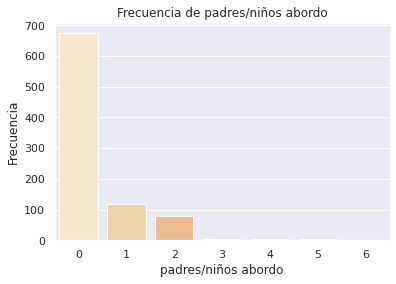

In [ ]:
countsParentsChildrenAboard = df1.ParentsChildrenAboard.value_counts()
sns.set(color_codes = True) 
sns.barplot(x=countsParentsChildrenAboard.index, y=countsParentsChildrenAboard.values, palette="OrRd")
plt.title("Frecuencia de padres/niños abordo")
plt.ylabel("Frecuencia")
plt.xlabel("padres/niños abordo")
plt.show()

#### Aqui se puede observar de mejor manera como se distribuyen los datos siendo que la mayoria no tenia un padre/niño entre la tripulación.

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [ ]:
modeSiblingsSpousesAboard = df1['ParentsChildrenAboard'].mode() # Calculo moda
print(modeSiblingsSpousesAboard)

0    0
dtype: int64


#### La cantidad de personas que tiene 0 padres/niños es la que mas se repite

#### <span style="color: #7A3BDB">Diagrama de Cajas</span>

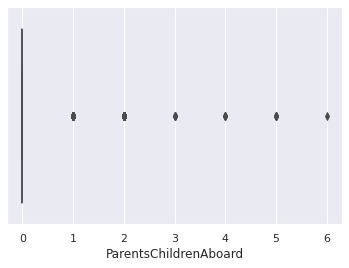

In [ ]:
sns.boxplot( x=df1["ParentsChildrenAboard"]) #genera el diagrama de caja y bigotes

#### Los cuartiles y sus extremos son todos 0, los extremos son 1, 2, 3, 4, 5 y 6.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [ ]:
varianceParentsChildrenAboard = df1['ParentsChildrenAboard'].var()# Calculo Varianza
print(varianceParentsChildrenAboard)

0.652001191018499


#### Esta distribucion practicamente no posee dispersión

#### <span style="color: #7A3BDB">Asimetria</span>

In [ ]:
df1['ParentsChildrenAboard'].skew()

2.74119806158299

#### ya que la asimetria es mayor a cero la distribución es asimetrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [ ]:
df1['ParentsChildrenAboard'].kurt()

9.72306591995913

#### Ya que curtosis > 3 la distribucion es Leptocúrtica

### Variable `Fare`

In [ ]:
(df1.groupby("Fare").agg(Frequency=("Fare", "count"))) #Muestra la tabla de frecuencia

,Frequency
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


#### Se puede ver mucha heterogeneidad entre los datos

#### <span style="color: #7A3BDB">Medidas de centralización</span>

In [ ]:
modeFare = df1['Fare'].mode() # Calculo moda
print(modeFare)

0    8.05
dtype: float64


#### El valor de tarifa que mas se repite es de 8.05 libras esterlinas

#### <span style="color: #7A3BDB">Diagrama de Cajas</span>

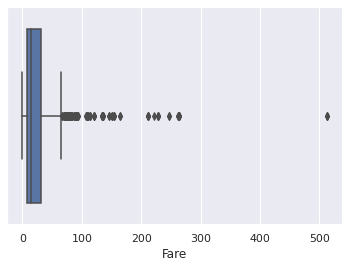

In [ ]:
sns.boxplot( x=df["Fare"]) #Diagrama de caja y bitote

#### La mediana es 14.4542 libras, el primer cuartil 7.925 libras y el tercer cuartil 31.1375 libras, su extremo inferior es de 0 libras y extremo superior de 75 libras aproximadamente, y su valor mas atipico es de 512.3292 libras esterlinas. 
#### Se puede observar que el diagrama es asimetrico a la izquierda, tambien tiene una muy alta dispersion de los datos.

#### <span style="color: #7A3BDB">Medidas de dispersión</span>

In [ ]:
varianceFare = df1['Fare'].var()# Calculo Varianza
print(varianceFare)

2478.2515464045473


#### Esta distribucion posee una alta dispersión

#### <span style="color: #7A3BDB">Asimetria</span>

In [ ]:
df1['Fare'].skew()

4.777671399019824

#### Ya que la asimetría es mayor que cero esta es una distribucion asimétrica a la derecha

#### <span style="color: #7A3BDB">Curtosis</span>

In [ ]:
df1['Fare'].kurt()

33.26460490128922

#### La curtosis es mayor a 3 por tanto la distribución es Leptocúrtica

## **Mapas de correlacion**

#### <span style="color: #7A3BDB">Correlacion</span>

In [ ]:
correlacionDf1 = df1.corr(method='pearson')
correlacionDf1

,Survived,Pclass,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Sex
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.091875
SiblingsSpousesAboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.113249
ParentsChildrenAboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.181137
Sex,-0.542152,0.129507,0.091875,-0.113249,-0.244337,-0.181137,1.000000


#### Reordenaremos el DateFrame para dejar solo las variables cuantitativas

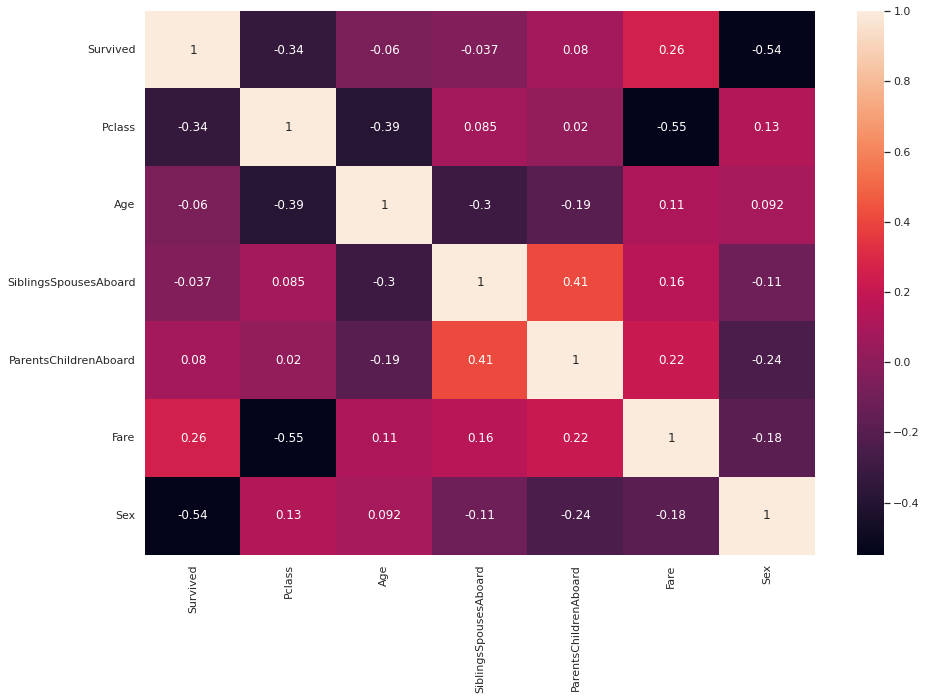

In [ ]:
#correlacionDf2 = df2.corr(method='pearson')
#correlacionDf2
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlacionDf1, annot=True, ax=ax )

#### Los colores oscuros representan los valores negativos y los claros a los positivos.
#### El color rojo representa una correlación lineal positiva con las variables Siblings/Spouses Aboard y Parents/Children Aboard

Text(0, 0.5, 'padres/niños abordo')

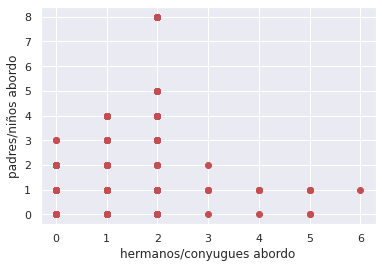

In [ ]:
plt.plot(df1["ParentsChildrenAboard"], df1["SiblingsSpousesAboard"], "ro")
plt.xlabel("hermanos/conyugues abordo")
plt.ylabel("padres/niños abordo")

Text(0, 0.5, 'Sex')

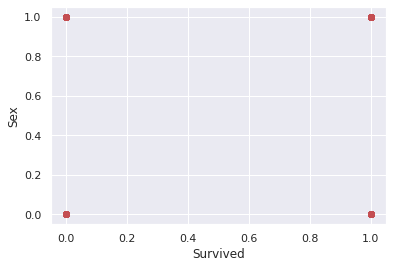

In [ ]:
plt.plot(df1["Survived"], df1["Sex"], "ro")
plt.xlabel("Survived")
plt.ylabel("Sex")

Text(0, 0.5, 'Fare')

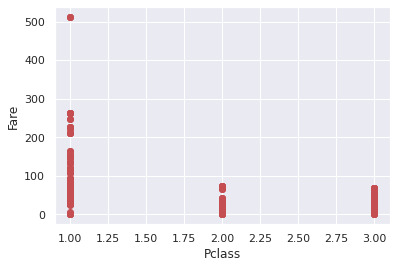

In [ ]:
plt.plot(df1["Pclass"], df1["Fare"], "ro")
plt.xlabel("Pclass")
plt.ylabel("Fare")

Text(0, 0.5, 'Age')

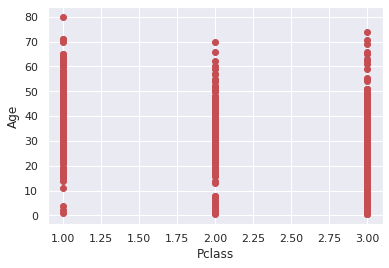

In [ ]:
plt.plot(df1["Pclass"], df1["Age"], "ro")
plt.xlabel("Pclass")
plt.ylabel("Age")

## **Conclusiones**

- Como se dijo mas arriba la variable `Name` podria quedar como un identificador unico.
- Al menos para este analisis las variables cualitativas no dieron mucha información en cambio en las cuantitativas todas mostraron mucha asimetria y dispersion de los datos a excepcion de la variable `Age`, quiza teniendo al total de pasajeros de este barco se puedan tener mejores distribuciones.
- Existen tres relaciones fuertes que estan graficadas arriba.
- Las variables `Parents/Children Aboard` y `Siblings/Spouses Aboard` se podrian juntar y hacer una sola llamada parientes esto dada su correlacion y el sentido que tienen.


##INFERENCIA ESTADÍSTICA




In [ ]:
#importar modulos para inferencia estadística
from scipy.stats import shapiro
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

In [ ]:
grupoClase=df1.groupby(by="Pclass") #se agrupan los datos según clase

In [ ]:
print(df1["Pclass"].unique()) #se observa que la clase solo tiene 3 valores posibles


[3 1 2]


In [ ]:
# Se agrupan de manera disjunta las clases
# De esta forma se puede segmentar por clase y hacer análisis entre los distintos grupos
clase1=grupoClase.get_group(1)
clase2=grupoClase.get_group(2)
clase3=grupoClase.get_group(3)


In [ ]:
#se crea un valor survive que es la media de survived para cada clase
# es un promedio entre ceros y unos, por lo que es un valor entre 0 y 1
#mientras más cerca de 1, es que en general, esa clase sobrevivió más
survive1=clase1["Survived"].mean()
survive2=clase2["Survived"].mean()
survive3=clase3["Survived"].mean()
print(survive1,survive2,survive3)
#A priori, se ve que la clase 1 sobrevive mas que la dos, y esta mas que la 3
#Hay que hacer la prueba de hipótesis 

0.6296296296296297 0.47282608695652173 0.24435318275154005


In [ ]:
#Shapiro wilk para normalidad
print("VARIABLE: EDAD")
print("H0: la variable distribuye normalmente")
print("H0: la variable no distribuye normalmente")
stat, p = shapiro(df1["Age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Se acepta la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución gaussiana')
else:
	print('Se rechaza la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución no gaussiana')
print()
print()
print("VARIABLE: TARIFA ")
print("H0: la variable distribuye normalmente")
print("H0: la variable no distribuye normalmente")
stat, p = shapiro(df["Fare"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Se acepta la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución gaussiana')
else:
	print('Se rechaza la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución no gaussiana')
print()
print()

VARIABLE: EDAD
H0: la variable distribuye normalmente
H0: la variable no distribuye normalmente
stat=0.978, p=0.000
Se rechaza la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución no gaussiana


VARIABLE: TARIFA 
H0: la variable distribuye normalmente
H0: la variable no distribuye normalmente
stat=0.523, p=0.000
Se rechaza la hipótesis nula, hay evidencia suficiente para afirmar que la variable sigue una distribución no gaussiana




In [ ]:
# Test de hipótesis de correlación de Pearson
print("Estudio de correlación: TARIFA vs SOBREVIVIR")
print("H0: No existe correlación entre las variables")
print("H1: SI existe correlación entre las variables")

stat, p = pearsonr(df1["Fare"], df1["Survived"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No se rechaza H0, Existe evidencia estadística suficiente para afirmar que NO HAY correlación entre las 2 variables')
else:
	print('Se rechaza H0, Existe evidencia estadística suficiente para afirmar que HAY correlación entre las 2 variables')

Estudio de correlación: TARIFA vs SOBREVIVIR
H0: No existe correlación entre las variables
H1: SI existe correlación entre las variables
stat=0.256, p=0.000
Se rechaza H0, Existe evidencia estadística suficiente para afirmar que HAY correlación entre las 2 variables


In [ ]:
# Test ANOVA para igualdad de medias
from scipy.stats import f_oneway
print("H0: Todas las medias son iguales")
print("H1: Todas las medias NO son iguales")

stat, p = f_oneway(clase1["Survived"], clase2["Survived"], clase3["Survived"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No hay evidencia suficiente para afirmar que alguna media es distinta de las demás')
else:
	print('Al menos la media de un grupo es distinta a las demás')

H0: Todas las medias son iguales
H1: Todas las medias NO son iguales
stat=56.934, p=0.000
Al menos la media de un grupo es distinta a las demás


In [ ]:
#Test de hipótesis igualdad de medias
print("Análisis de medias: CLASE 1 VS CLASE 2")
print("H0: la media de supervivencia de la clase 1 es menor o igual a la de la clase 2")
print("H0: la media de supervivencia de la clase 1 NO es menor o igual a la de la clase 2")
ttest,p_value = stats.ttest_ind(clase1["Survived"],clase2["Survived"])
print("p value:%.8f" % p_value)
print("Dado que el análisis es de una cola; p_value_una_cola:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Se rechaza la hipótesis nula, la media de supervivencia de la clase 1 ES MAYOR a la de la clase 2 ")
else:
    print("Se acepta la hipótesis nula, la media de supervivencia de la clase 1 es menor o igual a la de la clase 2")
print()
print()
print("Análisis de medias: CLASE 2 VS CLASE 3")
print("H0: la media de supervivencia de la clase 2 es menor o igual a la de la clase 3")
print("H0: la media de supervivencia de la clase 2 NO es menor o igual a la de la clase 3")
ttest,p_value = stats.ttest_ind(clase2["Survived"],clase3["Survived"])
print("p value:%.8f" % p_value)
print("Dado que el análisis es de una cola; p_value_una_cola:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Se rechaza la hipótesis nula, la media de supervivencia de la clase 2 ES MAYOR a la de la clase 3")
else:
    print("Se acepta la hipótesis nula, la media de supervivencia de la clase 2 es menor o igual a la de la clase 3")

print("Por transitividad, se comprueba que la media de supervivencia de la clase 1 ES MAYOR a la de la clase 3")

Análisis de medias: CLASE 1 VS CLASE 2
H0: la media de supervivencia de la clase 1 es menor o igual a la de la clase 2
H0: la media de supervivencia de la clase 1 NO es menor o igual a la de la clase 2
p value:0.00159547
Dado que el análisis es de una cola; p_value_una_cola:0.0008
Se rechaza la hipótesis nula, la media de supervivencia de la clase 1 ES MAYOR a la de la clase 2 


Análisis de medias: CLASE 2 VS CLASE 3
H0: la media de supervivencia de la clase 2 es menor o igual a la de la clase 3
H0: la media de supervivencia de la clase 2 NO es menor o igual a la de la clase 3
p value:0.00000001
Dado que el análisis es de una cola; p_value_una_cola:0.0000
Se rechaza la hipótesis nula, la media de supervivencia de la clase 2 ES MAYOR a la de la clase 3
Por transitividad, se comprueba que la media de supervivencia de la clase 1 ES MAYOR a la de la clase 3


In [ ]:
#se hace un modelo de regresión 
modelo=smf.ols("Survived ~Pclass+Sex+Age+Fare",df1)
result=modelo.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     137.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.65e-91
Time:                        00:31:47   Log-Likelihood:                -405.57
No. Observations:                 887   AIC:                             821.1
Df Residuals:                     882   BIC:                             845.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2888      0.071     18.106      0.0

In [ ]:
#Dado que el coeficiente de regresión angular asociado a la variable "Fare" no se podía asegurar que fuera distinto a 0
# se genera un segundo modelo sin incluirla
#se hace un modelo de regresión 
modelo=smf.ols("Survived ~Pclass+Sex+Age",df1)
result=modelo.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.19e-92
Time:                        00:31:47   Log-Likelihood:                -405.58
No. Observations:                 887   AIC:                             819.2
Df Residuals:                     883   BIC:                             838.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2947      0.058     22.136      0.0

In [ ]:
# Sexo y edad si cumplen el supuesto de linealidad
# tienen coeficientes negativos
# hay una relación inversa entre supervivencia y edad, se dió preferencia a los niños
# la supervivencia está más ligada al sexo 0. Las mujeres tienden a sobrevivir más
print("H0: todos los coeficientes de regresión angulares son distintos de 0")
print("H1: algún coeficiente de regresión angular es igual a 0, y por tanto, no cumple el supuesto")
print("Se puede asegurar con un 95% de confianza que todos los coeficientes de regresión angular son distintos de 0")
print("Dado que todos los coeficientes de regresión angular asociados a las variables CLASE, EDAD Y SEXO son distintos de 0")
print("El modelo 2 cumple el supuesto de normalidad para todos sus coeficientes")


H0: todos los coeficientes de regresión angulares son distintos de 0
H1: algún coeficiente de regresión angular es igual a 0, y por tanto, no cumple el supuesto
Se puede asegurar con un 95% de confianza que todos los coeficientes de regresión angular son distintos de 0
Dado que todos los coeficientes de regresión angular asociados a las variables CLASE, EDAD Y SEXO son distintos de 0
El modelo 2 cumple el supuesto de normalidad para todos sus coeficientes


In [ ]:
df1.head(1)

,Name,Survived,Pclass,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Sex
0,Mr. Owen Harris Braund,0,3,22.0,1,0,7.25,1


##Modelos de clasificacion

In [ ]:
df1

,Name,Survived,Pclass,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Sex
0,Mr. Owen Harris Braund,0,3,22.0,1,0,7.2500,1
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1,38.0,1,0,71.2833,0
2,Miss. Laina Heikkinen,1,3,26.0,0,0,7.9250,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,35.0,1,0,53.1000,0
4,Mr. William Henry Allen,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,0,2,27.0,0,0,13.0000,1
883,Miss. Margaret Edith Graham,1,1,19.0,0,0,30.0000,0
884,Miss. Catherine Helen Johnston,0,3,7.0,1,2,23.4500,0
885,Mr. Karl Howell Behr,1,1,26.0,0,0,30.0000,1


In [ ]:
df3=df1.drop(['Name'], axis=1)

In [ ]:
df3

,Survived,Pclass,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1
883,1,1,19.0,0,0,30.0000,0
884,0,3,7.0,1,2,23.4500,0
885,1,1,26.0,0,0,30.0000,1


Se quitan los nombres para utilizar solo variables cuantitativas

Asignar y dividir los datos de entrenamiento y de test

In [ ]:
x=df3.values
y= df1['Survived'].values

Como el Target de los modelos es survived se quitara del conjunto de entrenamiento

In [ ]:
x

array([[ 0.    ,  3.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  3.    ,  7.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 0.    ,  3.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [ ]:
x=np.delete(x,0,axis=1)

In [ ]:
x

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  7.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

Se dividen los datos en 70% y 30%

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Se estandarizan los datos 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
x_train_mm = scaler.fit_transform(x_train)
x_test_mm= scaler.transform(x_test)

##Decision Tree

In [ ]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train_mm,y_train)
dt_clf.score(x_test_mm,y_test)
y_pred=dt_clf.predict(x_test)
dt_clf.score(x_test_mm , y_test)

0.7790262172284644

## SVM

In [ ]:
from sklearn.svm import SVC
sv_clf=SVC(probability=True)
sv_clf.fit(x_test_mm , y_test)
sv_clf.score(x_test_mm , y_test)

0.8014981273408239

##Random Forest Classifier

In [ ]:
from sklearn import ensemble 
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train_mm,y_train)
rf_clf.score(x_test_mm,y_test)

0.8164794007490637

Curva Roc

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
dt_probs= dt_clf.predict_proba(x_test_mm)
rf_probs = rf_clf.predict_proba(x_test_mm)
sv_probs=sv_clf.predict_proba(x_test_mm)

In [ ]:
rf_probs=rf_probs[:,1]
sv_probs=sv_probs[:, 1]
dt_probs=dt_probs[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
dt_auc=roc_auc_score(y_test,dt_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
sv_auc=roc_auc_score(y_test,sv_probs)
r_auc=roc_auc_score(y_test,r_probs)

Score de Area bajo la curva para cada uno

In [ ]:
dt_auc



0.8176366843033509

In [ ]:
rf_auc

0.8536449147560259

In [ ]:
sv_auc

0.8681951793062904

In [ ]:
r_fpr,r_tpr,_ = roc_curve(y_test, r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test, rf_probs)
sv_fpr , sv_tpr,_ = roc_curve(y_test,sv_probs)
dt_fpr, dt_tpr,_ = roc_curve(y_test,dt_probs)

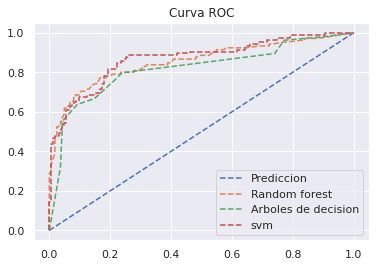

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(r_fpr,r_tpr, linestyle="--", label="Prediccion" % r_auc)
plt.plot(rf_fpr,rf_tpr, linestyle="--", label="Random forest" % rf_auc)
plt.plot(dt_fpr,dt_tpr, linestyle="--", label="Arboles de decision" % dt_auc)
plt.plot(sv_fpr,sv_tpr, linestyle="--", label="svm" % sv_auc)

plt.title('Curva ROC')
plt.legend()